# K NEAREST NEIGHBOUR

In [1]:
from sklearn.datasets import load_iris

In [2]:
iris = load_iris()

In [3]:
x = iris.data
y = iris.target

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=.20,random_state = 13)

In [7]:
xtrain.shape

(120, 4)

In [8]:
xtest.shape

(30, 4)

In [11]:
from sklearn.neighbors import KNeighborsClassifier

In [12]:
knn = KNeighborsClassifier(metric='euclidean')

In [13]:
knn.fit(xtrain,ytrain)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [14]:
t = xtest[0].reshape(1,-1)

In [15]:
t

array([[5.7, 2.8, 4.5, 1.3]])

In [16]:
# now e want to find the closest neighbour for this sample

In [17]:
n,m = knn.kneighbors(t,n_neighbors=5,return_distance=True)

In [18]:
n

array([[0.3       , 0.31622777, 0.33166248, 0.37416574, 0.4       ]])

In [19]:
m

array([[ 7, 12, 74, 21, 58]], dtype=int64)

In [20]:
# n -> distance for the five closed neighbors
# m -> index nos for the five closed neighbors

In [21]:
for i in m[0]:
    print(ytrain[i])

1
1
1
1
1


In [22]:
#all are from class 1

In [23]:
knn.predict(t)

array([1])

In [24]:
ytest[0]

1

In [25]:
#prediction on all the samples
pred = knn.predict(xtest)
pred

array([1, 1, 0, 2, 2, 0, 2, 2, 0, 1, 1, 1, 1, 0, 2, 0, 1, 2, 1, 0, 1, 0,
       0, 2, 1, 2, 0, 2, 1, 2])

In [26]:
from sklearn.metrics import accuracy_score

In [27]:
accuracy_score(ytest,pred)

0.9

In [28]:
#missclassified samples index

In [29]:
import numpy as np



In [30]:
np.where(ytest!=pred)

(array([10, 11, 16], dtype=int64),)

# how to decide the values for n_neighbours?

In [31]:
#taking a dataset having more number of samples

In [32]:
from sklearn.datasets import load_digits

In [33]:
digit = load_digits()

In [34]:
x = digit.data
y = digit.target

In [35]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=.20,random_state = 13)

In [36]:
xtrain.shape

(1437, 64)

In [37]:
knn = KNeighborsClassifier()

In [38]:
knn.fit(xtrain,ytrain)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [39]:
print(knn.score(xtest,ytest))

0.9833333333333333


In [40]:
# here the number of neighbors = 5

In [41]:
error=[]
for i in range(1,21):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(xtrain,ytrain)
    accuracy_test = knn.score(xtest,ytest)
    test_error = 1 - accuracy_test
    error.append(test_error)
    

In [42]:
error

[0.01388888888888884,
 0.019444444444444486,
 0.019444444444444486,
 0.01666666666666672,
 0.01666666666666672,
 0.01666666666666672,
 0.01666666666666672,
 0.01666666666666672,
 0.01666666666666672,
 0.01388888888888884,
 0.01666666666666672,
 0.01666666666666672,
 0.01666666666666672,
 0.019444444444444486,
 0.019444444444444486,
 0.025000000000000022,
 0.025000000000000022,
 0.030555555555555558,
 0.030555555555555558,
 0.030555555555555558]

In [43]:
#plotting this value

In [44]:
import matplotlib.pyplot as plt

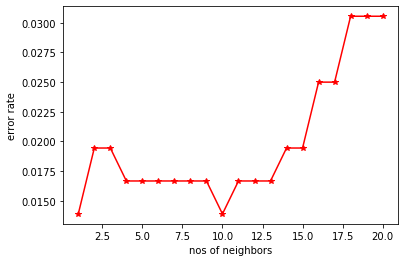

In [45]:
plt.plot(range(1,21),error,marker="*",color ="red")
plt.xlabel("nos of neighbors")
plt.ylabel("error rate")
plt.show()

In [46]:
# if nos of neighbors =10 then we are getting the least error rate

In [48]:
knn = KNeighborsClassifier(n_neighbors =10)
knn.fit(xtrain,ytrain)

score = knn.score(xtest,ytest)


In [49]:
print("The Score Is : ",score)

The Score Is :  0.9861111111111112


In [50]:
# for determine the hyperparameter n_neighbors we have one more approach

In [51]:
from sklearn.model_selection import GridSearchCV

In [53]:
#using this we can find the best value for the hyper parameters

In [54]:
knn = KNeighborsClassifier()

In [55]:
p = {'n_neighbors':[1,3,4,5,7]}

In [56]:
gd = GridSearchCV(knn,param_grid=p,scoring ='accuracy')

In [58]:
gd.fit(xtrain,ytrain)

GridSearchCV(cv=None, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': [1, 3, 4, 5, 7]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [60]:
gd.best_params_

{'n_neighbors': 3}

In [61]:
gd.score(xtest,ytest)

0.9805555555555555